### Fase 4. A/B Testing
El objetivo de esta fase es determinar si existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados, y si es así, cuál es la magnitud de esa relación. 

In [4]:
#Importamos librerías
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import scipy.stats as st
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

import os
import sys
sys.path.append("../")

import warnings
warnings.filterwarnings("ignore")

#Configuramos la visualización del DF.
pd.set_option('display.max_columns', None) 

In [5]:
#Abrimos el csv.
df= pd.read_csv('/Users/Tania_1/Desktop/ADALAB/MODULO_3/project-da-promo-angela-modulo-3-team-3/ETL/data/output_data/df_HR_limpio.csv', index_col=0)
df.head()

,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51,No,Unknown,684.0,6,3,Unknown,"162,0",1,M,51.0,3,5,Research Director,3,Unknown,19537.0,6462,7,No,13,"3,0",3,0,Unknown,5,3,20,15,15,1972,Yes
52,No,Unknown,699.0,1,4,Life Sciences,"259,0",3,M,65.0,2,5,Manager,3,Unknown,19999.0,5678,0,Unknown,14,"3,0",1,1,"34,0",5,3,33,11,9,1971,1
42,No,travel_rarely,532.0,4,2,Technical Degree,"319,0",3,M,58.0,3,5,Manager,4,Married,19232.0,4933,1,No,11,"3,0",4,0,"22,0",3,3,22,11,15,1981,1
47,No,travel_rarely,359.0,2,4,Medical,Unknown,1,F,82.0,3,4,Research Director,3,Married,17169.0,26703,3,Unknown,19,"3,0",2,2,Unknown,2,3,20,5,6,1976,False
48,No,Unknown,117.0,22,3,Medical,"1900,0",4,F,58.0,3,4,Manager,4,Unknown,17174.0,2437,3,No,11,"3,0",2,1,Unknown,3,3,22,4,7,1975,Yes


In [6]:
#Imprimimos la info del DF.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 51 to 35
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1080 non-null   object 
 1   BusinessTravel            1080 non-null   object 
 2   DailyRate                 1080 non-null   float64
 3   DistanceFromHome          1080 non-null   int64  
 4   Education                 1080 non-null   int64  
 5   EducationField            1080 non-null   object 
 6   EmployeeNumber            1080 non-null   object 
 7   EnvironmentSatisfaction   1080 non-null   int64  
 8   Gender                    1080 non-null   object 
 9   HourlyRate                1080 non-null   float64
 10  JobInvolvement            1080 non-null   int64  
 11  JobLevel                  1080 non-null   int64  
 12  JobRole                   1080 non-null   object 
 13  JobSatisfaction           1080 non-null   int64  
 14  MaritalStatus 

In [7]:
#Buscamos los principales estadísticos de las columnas numéricas.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,1080.0,803.129648,387.957708,103.0,497.50,803.129648,1141.000000,1498.0
DistanceFromHome,1080.0,11.179630,10.272071,1.0,2.00,8.000000,17.000000,49.0
Education,1080.0,2.927778,1.035231,1.0,2.00,3.000000,4.000000,5.0
EnvironmentSatisfaction,1080.0,4.258333,6.774463,1.0,2.00,3.000000,4.000000,49.0
HourlyRate,1080.0,65.969548,19.731235,30.0,50.00,65.969548,83.000000,100.0
JobInvolvement,1080.0,2.708333,0.717273,1.0,2.00,3.000000,3.000000,4.0
JobLevel,1080.0,2.059259,1.101943,1.0,1.00,2.000000,3.000000,5.0
JobSatisfaction,1080.0,2.737963,1.113088,1.0,2.00,3.000000,4.000000,4.0
MonthlyIncome,1080.0,6463.923077,3326.668716,1009.0,4968.75,6463.923077,6463.923077,19999.0
MonthlyRate,1080.0,14240.657407,7062.289655,2097.0,8158.00,14150.000000,20335.750000,26999.0


In [8]:
#Buscamos los principales estádisticos para las columnas categóricas.
df.describe(include='O').T

,count,unique,top,freq
Attrition,1080,2,No,903
BusinessTravel,1080,4,Unknown,534
EducationField,1080,7,Unknown,496
EmployeeNumber,1080,1080,"162,0",1
Gender,1080,2,M,651
JobRole,1080,9,Sales Executive,240
MaritalStatus,1080,4,Unknown,425
OverTime,1080,3,No,449
PerformanceRating,1080,3,"3,0",799
TotalWorkingYears,1080,41,Unknown,360


Después de imprimir los principales estadísticos, pasamos a trabajar con las columnas que nos piden.

Partiremos de la siguiente hipótesis, "Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa". Para ello deberéis crear una columna nueva en base al nivel de satisfacción en el trabajo para crear dos grupos, las condiciones para crear los grupos son:

Grupo A (Control): Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5.

Grupo B (Variante): Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala.


In [9]:
#Buscamos en la columna 'JonSatisfaction' los valores únicos para encontrar a los miembros de cada grupo de control.
df['JobSatisfaction'].value_counts()

JobSatisfaction
4    348
3    317
1    216
2    199
Name: count, dtype: int64

In [10]:
#Creamos una nueva columna llamada Group en la que agrupamos a los empleados en función de sus niveles de satisfacción.
df['Group'] = np.where(df['JobSatisfaction'] >= 3, 'A', 'B')
df['Group'].value_counts()

Group
A    665
B    415
Name: count, dtype: int64

La métrica principal que debemos usar es la tasa de rotación de empleados (Attrition) en cada grupo. Recordemos que, en esta columna, "No" indica que el empleado no ha dejado la empresa (sin rotación), mientras que "Yes" indica que el empleado ha dejado la empresa (con rotación).

Por lo tanto, los pasos que deberás seguir en esta fase son:

Divide a los empleados en los grupos A y B según los criterios establecidos.

In [11]:
#Dividimos a los empleados de los grupos A y B en función de si han dejado la empresa o no.
attrition_A = df[df['Group'] == 'A']['Attrition']
attrition_B = df[df['Group'] == 'B']['Attrition']

In [12]:
#Para ver la relación entre estas variables categóricas, creamos una tabla de contingencia.
tabla_contingencia= pd.crosstab(df['Group'], df['Attrition'])
tabla_contingencia

Attrition,No,Yes
Group,,
A,571,94
B,332,83


Calcula la tasa de rotación (porcentaje de empleados que dejaron la empresa) en cada grupo.

In [13]:
#Como los datos numéricos no nos dan toda la información que necesitamos o no de la manera más evidente, calculamos los porcentajes.
tabla_contingencia = pd.crosstab(df['Group'], df['Attrition'], normalize='index') * 100
tabla_contingencia.round(2)

Attrition,No,Yes
Group,,
A,85.86,14.14
B,80.00,20.00


**Observaciones:**
Observamos que en el grupo A, donde los empleados tienen unos niveles de satisfacción altos, la tasa de rotación es del 13.67%, mientras que en el grupo B, la tasa de rotación es del 19.87%, lo que significa que el porcentaje de empleados que se han ido en el grupo A es menor al del grupo B, donde los niveles de satisfacción son más bajos.

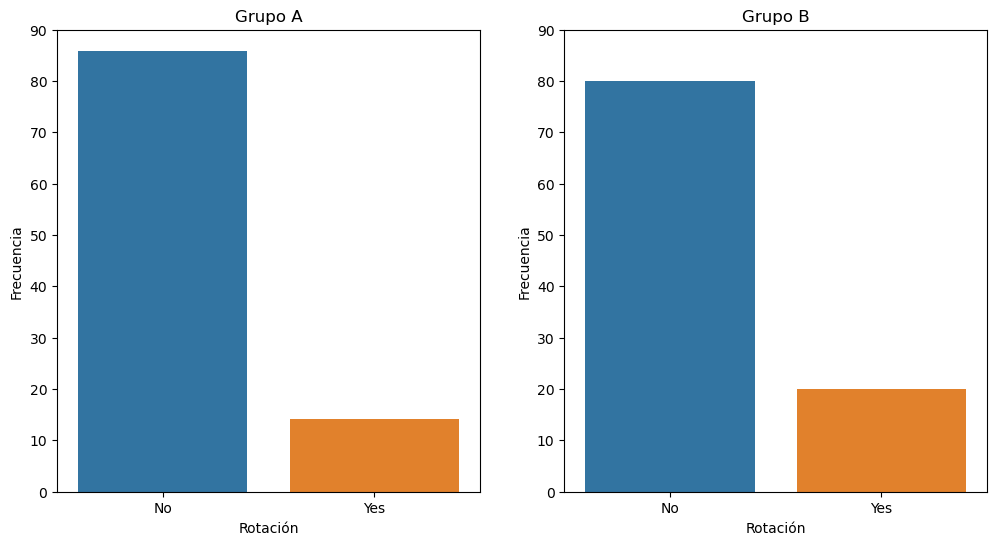

In [14]:
#Visualizamos los datos de las variables de la tabla de contingencia.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#Gráfico de barras para grupo A.
sns.barplot(x=tabla_contingencia.columns, y=tabla_contingencia.loc['A'], ax=axes[0])
axes[0].set_title('Grupo A')
axes[0].set_xlabel('Rotación')
axes[0].set_ylabel('Frecuencia')
axes[0].set_ylim(0, 90);

#Gráfico de barras para grupo B.
sns.barplot(x=tabla_contingencia.columns, y=tabla_contingencia.loc['B'], ax=axes[1])
axes[1].set_title('Grupo B')
axes[1].set_xlabel('Rotación')
axes[1].set_ylabel('Frecuencia')
axes[1].set_ylim(0, 90);

Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.

In [15]:
#Antes de realizar la prueba, comprobamos si la distribución de los datos es normal o no.
df['rotacion_grupo_A'] = ((df['Group'] == 'A') & (df['Attrition'] == 'Yes')).astype(int)
df['rotacion_grupo_B'] = ((df['Group'] == 'B') & (df['Attrition'] == 'Yes')).astype(int)

#Hacemos el de Shapiro-Wilk para comprobar la normalidad.
statistic, p_value_a = stats.shapiro(df['rotacion_grupo_A'])
if p_value_a > 0.05:
    print(f"Para la columna 'rotacion_grupo_A', los datos siguen una distribución normal, p-value: {p_value_a:.5f}")
else:
    print(f"Para la columna 'rotacion_grupo_A', los datos no siguen una distribución normal, p-value: {p_value_a:.5f}")

print('...................................................................')

statistic, p_value_b = stats.shapiro(df['rotacion_grupo_B'])
if p_value_b > 0.05:
    print(f"Para la columna 'rotacion_grupo_B', los datos siguen una distribución normal, p-value: {p_value_b:.5f}")
else:
    print(f"Para la columna 'rotacion_grupo_B', los datos no siguen una distribución normal, p-value: {p_value_b:.5f}")

Para la columna 'rotacion_grupo_A', los datos no siguen una distribución normal, p-value: 0.00000
...................................................................
Para la columna 'rotacion_grupo_B', los datos no siguen una distribución normal, p-value: 0.00000


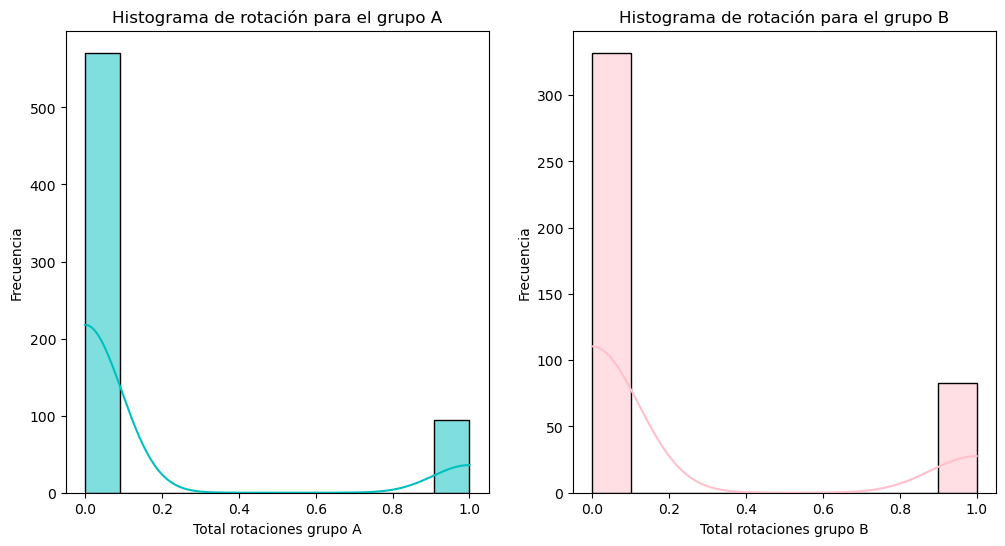

In [16]:
#Comprobamos la distribución de los datos con dos histoplots para ver si coincide con los resultados del test de Shapiro-Wilk.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#Histograma para 'rotacion_grupo_A' en el grupo 'A'
sns.histplot(x='rotacion_grupo_A', data=df[df['Group'] == 'A'], color='c', ax=axes[0], kde=True)
axes[0].set_title('Histograma de rotación para el grupo A')
axes[0].set_xlabel('Total rotaciones grupo A')
axes[0].set_ylabel('Frecuencia')

#Histograma para 'rotacion_grupo_B' en el grupo 'B'
sns.histplot(x='rotacion_grupo_B', data=df[df['Group'] == 'B'], color='pink', ax=axes[1], kde=True)
axes[1].set_title('Histograma de rotación para el grupo B')
axes[1].set_xlabel('Total rotaciones grupo B')
axes[1].set_ylabel('Frecuencia');

Diferencia de medias: -0.05864661654135339


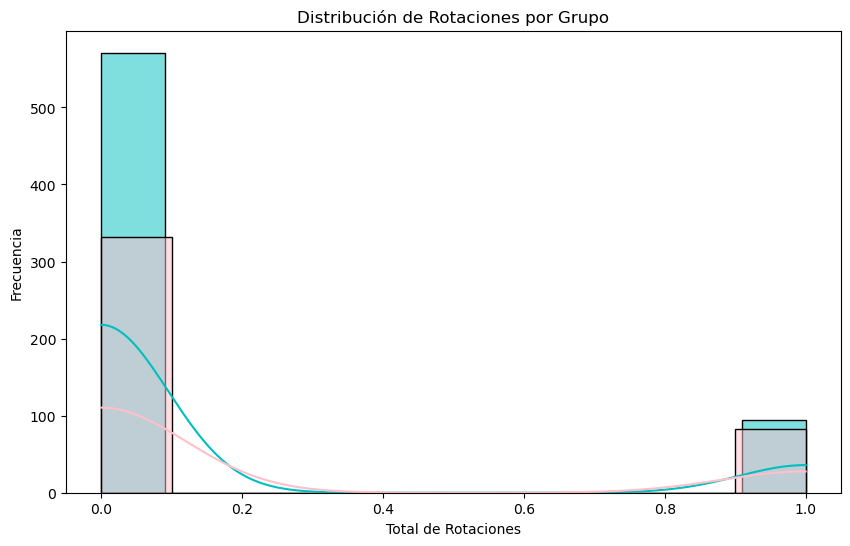

In [17]:
#Volvemos a comprobar la distribución de los datos con un histoplot en el que se ha calculado la media.
rotaciones_A = df[df['Group'] == 'A']['rotacion_grupo_A']
rotaciones_B = df[df['Group'] == 'B']['rotacion_grupo_B']

# Calcular la diferencia de medias entre los grupos A y B
diferencia_de_medias = np.mean(rotaciones_A) - np.mean(rotaciones_B)
print(f"Diferencia de medias: {diferencia_de_medias}")

# Visualización de las distribuciones
plt.figure(figsize=(10, 6))

sns.histplot(rotaciones_A, color='c', label='Grupo A', kde=True)
sns.histplot(rotaciones_B, color='pink', label='Grupo B', kde=True)

plt.title('Distribución de Rotaciones por Grupo')
plt.xlabel('Total de Rotaciones')
plt.ylabel('Frecuencia');

In [18]:
#Comprobamos la homogeneidad de las variancias.
rotacion_grupo_A = df.loc[df['Group'] == 'A', 'rotacion_grupo_A']
rotacion_grupo_B = df.loc[df['Group'] == 'B', 'rotacion_grupo_B']

#Realizamos el test de Levene para verificar la homogeneidad de las varianzas
statistic, p_value = stats.levene(rotacion_grupo_A, rotacion_grupo_B)

#Imprimimos los resultados
if p_value > 0.05:
    print(f"Las varianzas son homogéneas, p-value: {p_value}")
else:
    print(f"Las varianzas no son homogéneas, p-value: {p_value}")

Las varianzas no son homogéneas, p-value: 0.011296447975534604


### Prueba de hipótesis: 
Como las variancias no son homogéneas y la distribución tampoco es normal, utilizamos la prueba de Mann Whitney para comparar si existe una diferencia significativa entre la rotación del grupo A y del grupo B y así descartar una de las siguientes hipótesis.

    - Hipótesis Nula (H0): No existe una diferencia significativa entre la rotación del grupo A y del grupo B.
    - Hipótesis Alternativa (H1): Existe una diferencia significativa entre la rotación del grupo A y del grupo B.

In [19]:
#Importamos la librería.
from scipy.stats import mannwhitneyu

#Usamos los datos filtrados.
rotacion_grupo_A = df.loc[df['Group'] == 'A', 'rotacion_grupo_A']
rotacion_grupo_B = df.loc[df['Group'] == 'B', 'rotacion_grupo_B']

#Realizamos el test de Mann Whitney para comparar las tasas de conversión porque las distribuciones no son normales y las variancias no son homogéneas.
statistic, p_value = mannwhitneyu(rotacion_grupo_A, rotacion_grupo_B)

print(f'El valor del p_value es de {p_value}')
print('......................................')

#Alfa
alfa=0.05
#Comparamos el valor p con el nivel de significancia.
if p_value > alfa:
    print("No podemos rechazar la hipótesis nula.")
    print("No existe una diferencia significativa entre la rotación del grupo A y del grupo B.")
else:
    print("Rechazamos la hipótesis nula.")
    print("Existe una diferencia significativa entre la rotación del grupo A y del grupo B.")

El valor del p_value es de 0.011366403739309406
......................................
Rechazamos la hipótesis nula.
Existe una diferencia significativa entre la rotación del grupo A y del grupo B.


Ahora que hemos rechazado la hipótesis nula, utilizamos la diferencia de medias para calcular la magnitud de la relación.

In [20]:
#Calculamos la diferencia de medias.
media_grupo_A= df.loc[df['Group'] == 'A', 'rotacion_grupo_A'].mean()
media_grupo_B= df.loc[df['Group'] == 'B', 'rotacion_grupo_B'].mean()

diferencia_de_medias= media_grupo_A - media_grupo_B
print(f'La diferencia de medias es de: {diferencia_de_medias}')
print('......................................................')
porcentaje_diferencia= diferencia_de_medias * 100
print(f'El porcentaje de diferencia es de: {porcentaje_diferencia:.2f}%')

La diferencia de medias es de: -0.05864661654135339
......................................................
El porcentaje de diferencia es de: -5.86%


La **diferencia de medias** indica que, en promedio, la rotación en el grupo A es un 6.20% menor que en el grupo B. 
Este 6.20% concide con la resta del porcentaje de 'yes' de la tabla de contingencia del grupo A (13.67%) y del grupo B (19.87).